In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Números y Datos
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Set seed for random generation
seed = 3569
np.random.seed(seed)

genre_config = {
    'jazz': 1,
    'classical' : 2,
    'drum-and-bass' : 3,
    'death-metal' : 4,
    'ambient' : 5,
    'ska' : 6,
    'singer-songwriter' : 7,
    'opera' : 8,
    'trance' : 9
}

In [17]:
df_spotify = pd.read_pickle('sources/df_merged_posta_preprocesado.pickle')

In [18]:
df_spotify.head(10)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,genre,...,confidence_iqr,loudness_start_iqr,loudness_max_time_iqr,loudness_max_iqr,loudness_start_dif_mediana,loudness_max_time_dif_mediana,loudness_max_dif_mediana,loudness_start_dif_iqr,loudness_max_time_dif_iqr,loudness_max_dif_iqr
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,0.725755,0.165327,-0.926818,-0.919436,0.251604,0.589456,0.274320,-0.497712,-0.312941,jazz,...,0.261407,0.908309,-1.618096,1.213091,1.473536,-0.273968,-0.403317,0.502527,-2.261875,0.944216
3X3p3u03P8eFL8WTH0oaaU,0.691833,0.877028,-0.714776,-0.676389,-0.176941,0.579444,-1.283714,0.596316,-0.623722,jazz,...,0.444660,0.068075,0.349995,0.402848,1.138462,0.353570,0.868740,0.978387,0.157316,0.639654
4KlXeaheot0OI9PoOWspvZ,0.720744,1.950719,-0.465723,-0.046070,-0.393971,0.206547,-1.120831,0.441398,-0.804646,jazz,...,1.324035,0.876758,0.876269,1.264461,1.656145,0.375640,-1.012569,0.554105,-0.566373,1.949414
3j76McoUI18gDoqxYE14Bu,0.186198,1.227334,-0.063341,-0.682304,-1.455776,0.329218,1.784733,0.185260,-0.166218,jazz,...,1.099103,-0.204868,-1.006768,0.344500,1.394442,-0.162954,0.509291,-0.307881,-0.810756,1.650297
4zxd4tiXPlWMqoJltbVTbE,0.258362,0.152506,-0.930528,-0.353062,-0.834427,0.706628,-0.585695,-0.073493,-0.956778,jazz,...,1.873911,1.196264,0.360360,1.631485,1.128196,0.609341,1.034118,0.744970,-0.798959,0.171317
4LInRUJ6XN1TVnoRVAFcdB,0.090007,0.972936,-0.886054,-0.906002,-0.202428,-0.065878,0.514053,-0.677141,-2.322821,jazz,...,0.381451,0.319070,-0.868018,0.639027,0.657361,0.335563,1.839983,0.420511,-1.296164,1.483422
16QhvfPMBLpo7sFqOqTff3,0.293285,-0.027855,-0.801891,-0.249595,-0.640485,0.834427,0.251604,0.053830,-0.126839,jazz,...,1.036375,0.441279,0.277180,0.634777,1.640936,-1.487505,1.529423,0.368925,-0.049212,0.356598
2kF9Ijd7I2Kk2P4bYqUmzG,-0.151635,1.113457,-0.344722,-0.442587,-0.315311,0.206547,0.131193,0.749416,0.839918,jazz,...,-0.271692,-0.583200,-1.192801,0.295056,0.880842,-0.643996,1.375004,1.000679,-1.198543,1.561273
7pKWTcPfT9mg2iAhobFHpS,-0.125617,0.522948,-0.837455,-0.434489,0.325306,0.979622,0.012660,-0.447457,-0.487792,jazz,...,-0.017590,0.414213,-1.188610,1.165940,1.742032,0.037212,1.618055,-0.199529,-2.362123,0.606636


In [19]:
genre_real = df_spotify['genre']
genre_numeric = [genre_config[item] for item in genre_real]

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_spotify.select_dtypes(include=numerics)

In [21]:
def plot_conf_matrix(real, Z2, xlabels, description):
    mat = confusion_matrix(real, Z2)
    sns.heatmap(
        mat.T,
        square=True,
        annot=True,
        fmt='d',
        cbar=False,
        xticklabels=xlabels,
        yticklabels=range(9)
    )
    plt.xlabel('Real')
    plt.ylabel(description)
    plt.show()

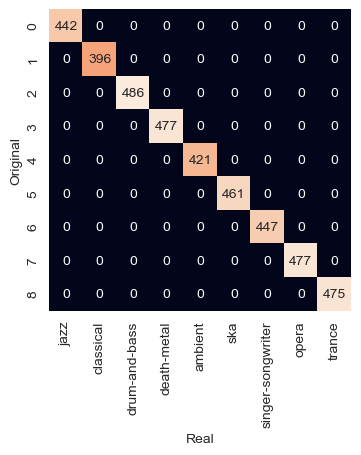

In [22]:
genres = genre_real.unique()

plot_conf_matrix(
    genre_real.values,
    genre_real.values,
    genres,
    'Original'
)

In [23]:
# Efecto Uniforme
clusters = df_spotify.genre.value_counts()
print(np.std(clusters)/np.mean(clusters))

0.06243141865809519


In [24]:
## Validación Interna
from sklearn.metrics.pairwise import euclidean_distances

df = df_spotify.drop(['genre'], axis=1)
d  = euclidean_distances(df, df)

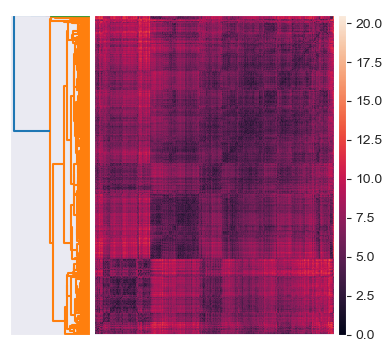

In [25]:
import pylab
from scipy.cluster.hierarchy import dendrogram, linkage

# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

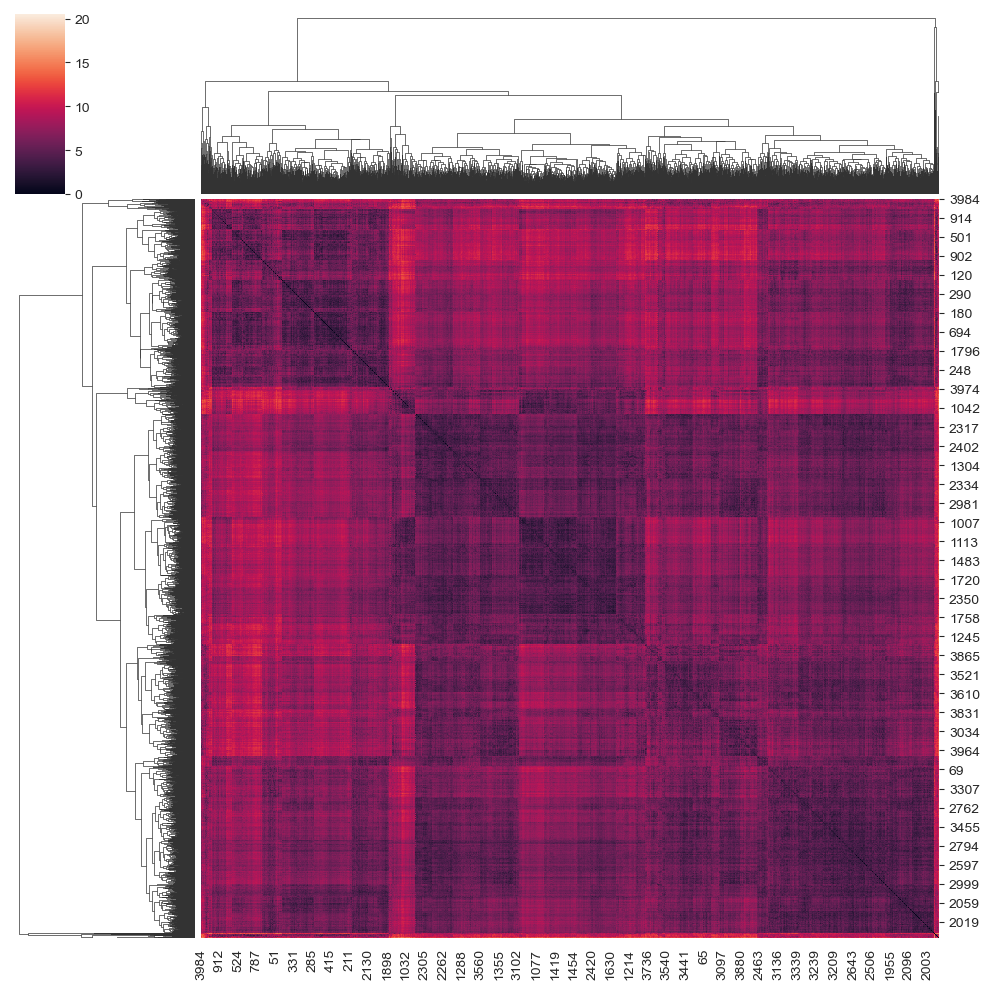

In [26]:
sns.clustermap(d)

In [27]:
from sklearn.metrics import  silhouette_score

## Silhuette usando sklearn
silhouette_avg = silhouette_score(df, df_spotify.genre)
silhouette_avg

0.04639983601990313

In [28]:
from sklearn.metrics import  silhouette_samples

## Silhuette usando sklearn
sample_silhouette_values = silhouette_samples(df, df_spotify.genre)
sample_silhouette_values

array([ 0.07235125,  0.04527656, -0.01763438, ...,  0.05430008,
        0.03012214,  0.01024079])

In [29]:
# Estimar el coeficiente de Silhouette para cada cluster
cluster_labels = df_spotify.genre
clusters = np.unique(cluster_labels)
ith_cluster_silhouette_avg = []
for cluster in clusters:
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
    ith_cluster_silhouette_avg.append(
        {
            "cluster": cluster,
            "silhouette_avg": np.mean(ith_cluster_silhouette_values)
        }
    )
ith_cluster_silhouette_avg

[{'cluster': 'ambient', 'silhouette_avg': -0.06604906596142535},
 {'cluster': 'classical', 'silhouette_avg': -0.04187325624305379},
 {'cluster': 'death-metal', 'silhouette_avg': 0.28275197458243956},
 {'cluster': 'drum-and-bass', 'silhouette_avg': 0.00526448595851782},
 {'cluster': 'jazz', 'silhouette_avg': -0.007256496844208614},
 {'cluster': 'opera', 'silhouette_avg': 0.11101716150918323},
 {'cluster': 'singer-songwriter', 'silhouette_avg': 0.04362525481939593},
 {'cluster': 'ska', 'silhouette_avg': 0.04705678444061752},
 {'cluster': 'trance', 'silhouette_avg': 0.010906329356629697}]

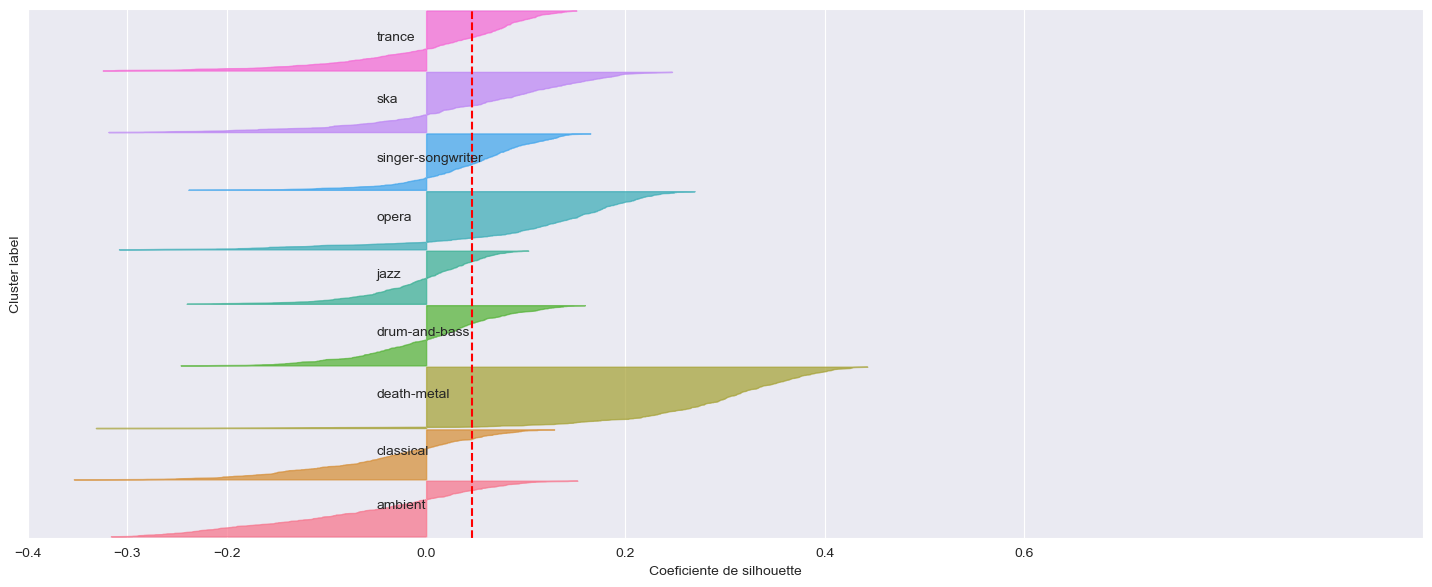

In [30]:
palette = iter(
    sns.husl_palette(
        len(clusters)
    )
)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_spotify) + (len(clusters) + 1) * 10])

y_lower = 10
for cluster in clusters:
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = next(palette)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, cluster)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Coeficiente de silhouette")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(
    x=silhouette_avg,
    color="red",
    linestyle="--"
)

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.4, -0.3, -0.2, 0, 0.2, 0.4, 0.6])

plt.show()